# Contrast Enhancement

In [1]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

from skimage.color import rgb2gray
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def apply_negative_transformation(img):
    return 1 - img

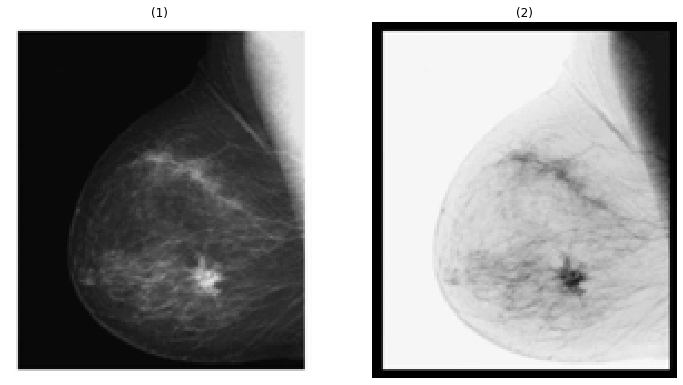

In [3]:
img = rgb2gray(io.imread('./images/picture1.png'))
show_images([img, apply_negative_transformation(img)])

In [4]:
'''
Contrast Enhancement
'''
def apply_contrast_enhancement(img):
    gray_scale_img = rgb2gray(img) * 255
    enhanced_img = np.copy(gray_scale_img)
    
    mask = (gray_scale_img >= 0) & (gray_scale_img <= 100)
    enhanced_img[mask] = ((gray_scale_img*1.5) + 50)[mask]
    
    return enhanced_img/255

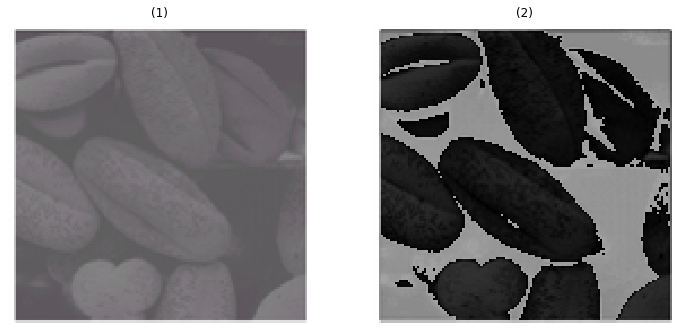

In [5]:
coffee = io.imread('./images/picture2.png')
show_images([coffee, apply_contrast_enhancement(coffee)])

In [6]:
'''
Gamma Correction
'''
def Gamma_Correction (img, gamma, constant):
    gray_scale_img = rgb2gray(img)
    return constant*(gray_scale_img**gamma)

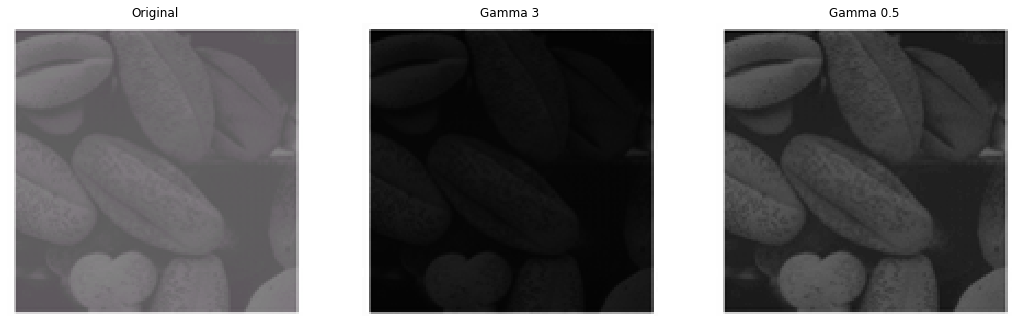

In [7]:
coffee = io.imread('./images/picture2.png')

coffee_gamma = Gamma_Correction(coffee, constant=1, gamma=3)
coffee_gamma2 = Gamma_Correction(coffee, constant=1, gamma=0.5)

show_images([coffee,coffee_gamma, coffee_gamma2], 
            titles=['Original', 'Gamma 3', 'Gamma 0.5']
            )


In [8]:
'''
Histogram Equalization
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def apply_histogram_equalization(image):
    height = image.shape[0]
    width = image.shape[1]
    
    enhanced_img = np.copy(image)
    
    cumulative_histogram = np.zeros(256)
    hist = histogram(image)
    cumulative_histogram[0] = hist[0][0]
    
    
    for i in range(1, len(hist[0])):
        cumulative_histogram[i] = cumulative_histogram[i-1] + hist[0][i]
    
    num_pixels = height*width
    for i in range(height):
        for j in range(width):
            enhanced_img[i,j] = round(255 * cumulative_histogram[enhanced_img[i,j]] / num_pixels)
            
    return enhanced_img

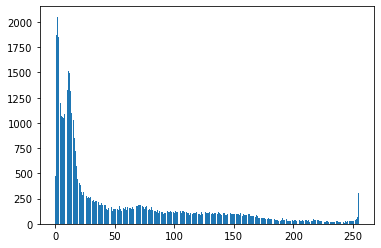

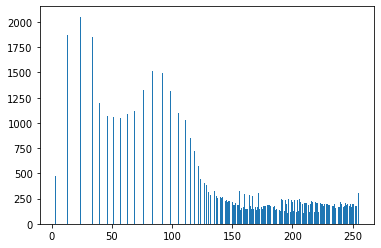

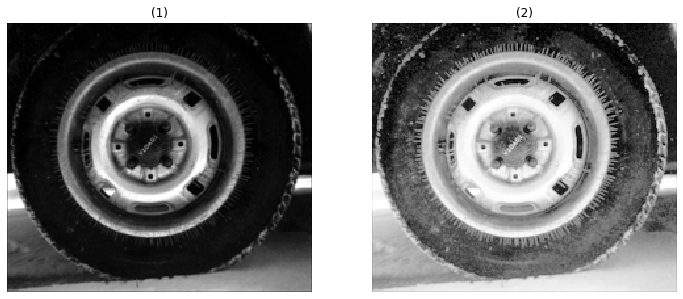

In [9]:
image = io.imread('./images/tire.tif')
enhanced_image = apply_histogram_equalization(image)

showHist(image)
showHist(enhanced_image)
show_images([image,enhanced_image])